In [0]:
df = spark.read.csv("/databricks-datasets/airlines/part-00000", header=True, inferSchema = True)
df.show(5)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+------------+------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|IsArrDelayed|IsDepDelayed|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+------------+------------+
|1987|   10|    

In [0]:
df_clean = df.select("Year","Month","DayOfMonth","DepDelay","ArrDelay","UniqueCarrier","Origin","Dest")
df_clean.show(5)

+----+-----+----------+--------+--------+-------------+------+----+
|Year|Month|DayOfMonth|DepDelay|ArrDelay|UniqueCarrier|Origin|Dest|
+----+-----+----------+--------+--------+-------------+------+----+
|1987|   10|        14|      11|      23|           PS|   SAN| SFO|
|1987|   10|        15|      -1|      14|           PS|   SAN| SFO|
|1987|   10|        17|      11|      29|           PS|   SAN| SFO|
|1987|   10|        18|      -1|      -2|           PS|   SAN| SFO|
|1987|   10|        19|      19|      33|           PS|   SAN| SFO|
+----+-----+----------+--------+--------+-------------+------+----+
only showing top 5 rows



In [0]:
df_filtered = df_clean.na.drop()
df_filtered.show(5)

+----+-----+----------+--------+--------+-------------+------+----+
|Year|Month|DayOfMonth|DepDelay|ArrDelay|UniqueCarrier|Origin|Dest|
+----+-----+----------+--------+--------+-------------+------+----+
|1987|   10|        14|      11|      23|           PS|   SAN| SFO|
|1987|   10|        15|      -1|      14|           PS|   SAN| SFO|
|1987|   10|        17|      11|      29|           PS|   SAN| SFO|
|1987|   10|        18|      -1|      -2|           PS|   SAN| SFO|
|1987|   10|        19|      19|      33|           PS|   SAN| SFO|
+----+-----+----------+--------+--------+-------------+------+----+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import avg

avg_delays = df_filtered.groupBy("UniqueCarrier").agg(
    avg("DepDelay").alias("Avg_Departure_Delay"),
    avg("ArrDelay").alias("Avg_Arrival_Delay")
)

avg_delays.show()


+-------------+-------------------+------------------+
|UniqueCarrier|Avg_Departure_Delay| Avg_Arrival_Delay|
+-------------+-------------------+------------------+
|           UA|  5.308353662164574| 5.373086861458955|
|           PS| 11.058201824236281|15.110103391982587|
|           TW| 5.0309916451598795|5.8652493150684935|
|           EA|    6.2097255310204| 6.273365661280911|
|           NW|  4.870520750059606| 8.597263516845858|
|           HP|  5.501129505377794| 9.314709159042572|
|           WN|  7.236082572752903| 4.598222392125006|
|           PI|  6.174465497375496| 7.718183711726724|
|           DL|  4.658810969294262|  8.16234956563322|
|           CO|  4.922316185106883|2.0199623352165723|
|       PA (1)| 4.3475925751436915| 7.402154398563734|
|           AA|  4.267938644377226| 2.437455158559334|
|           US|  5.715378159097267| 7.916648510691275|
|           AS| 7.0120103725945135|10.100887372013652|
+-------------+-------------------+------------------+



In [0]:
avg_delays.orderBy(
    "Avg_Arrival_Delay", ascending=False).show()

+-------------+-------------------+------------------+
|UniqueCarrier|Avg_Departure_Delay| Avg_Arrival_Delay|
+-------------+-------------------+------------------+
|           PS| 11.058201824236281|15.110103391982587|
|           AS| 7.0120103725945135|10.100887372013652|
|           HP|  5.501129505377794| 9.314709159042572|
|           NW|  4.870520750059606| 8.597263516845858|
|           DL|  4.658810969294262|  8.16234956563322|
|           US|  5.715378159097267| 7.916648510691275|
|           PI|  6.174465497375496| 7.718183711726724|
|       PA (1)| 4.3475925751436915| 7.402154398563734|
|           EA|    6.2097255310204| 6.273365661280911|
|           TW| 5.0309916451598795|5.8652493150684935|
|           UA|  5.308353662164574| 5.373086861458955|
|           WN|  7.236082572752903| 4.598222392125006|
|           AA|  4.267938644377226| 2.437455158559334|
|           CO|  4.922316185106883|2.0199623352165723|
+-------------+-------------------+------------------+



In [0]:
avg_delays.write.mode("overwrite").csv("/tmp/airline_delay_summary")

In [0]:
pandas_df = avg_delays.toPandas()

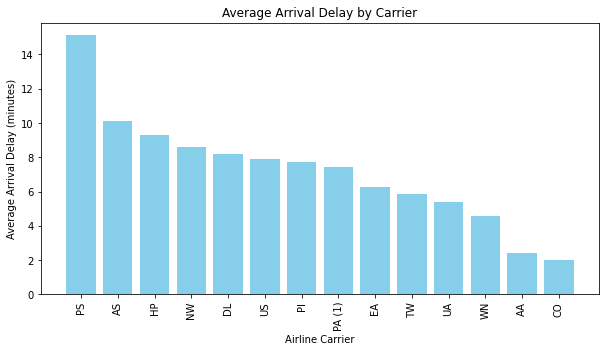

In [0]:
import matplotlib.pyplot as plt

# Sort values
pandas_df_sorted = pandas_df.sort_values("Avg_Arrival_Delay", ascending=False)

# Bar plot
plt.figure(figsize=(10,5))
plt.bar(pandas_df_sorted["UniqueCarrier"], pandas_df_sorted["Avg_Arrival_Delay"], color='skyblue')
plt.xlabel("Airline Carrier")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay by Carrier")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()
